<a href="https://colab.research.google.com/github/BaberFarooqui/Material-Science/blob/main/MonteCarlo_2D_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

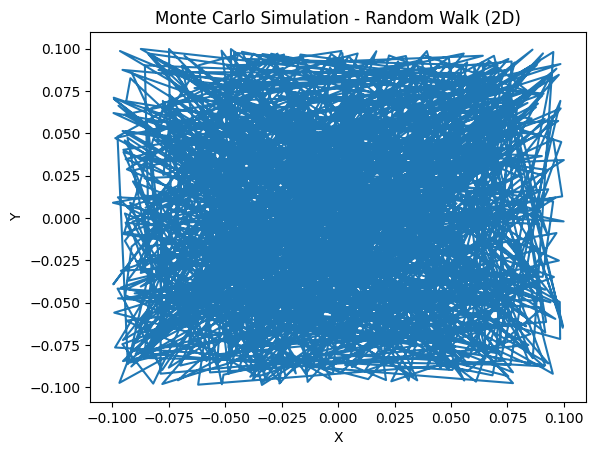

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
num_steps = 1000  # Number of steps in the simulation
step_size = 0.1  # Step size for each random walk
dimensions = 2  # Number of dimensions (2D in this case)

# Initialize starting position as a 2D array
position = np.zeros((num_steps, dimensions))

# Perform random walk simulation
for step in range(num_steps):
  # Generate random direction vector
  direction = np.random.rand(dimensions) * 2 - 1  # Random values between -1 and 1

  # Update position based on step size and direction
  position[step] += direction * step_size # store the position at each step

# Plot the trajectory
plt.plot(position[:, 0], position[:, 1])  # Extract x and y coordinates
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Monte Carlo Simulation - Random Walk (2D)')
plt.show()


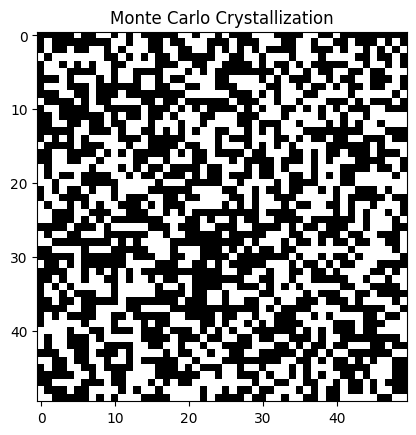

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Simulation parameters
grid_size = 50  # Size of the grid
temperature = 0.5  # Temperature (affects crystallization rate)
num_steps = 10000  # Number of Monte Carlo steps

# Initialize the grid with random values (0 or 1)
grid = np.random.randint(2, size=(grid_size, grid_size))

# Function to calculate the energy of a given configuration
def calculate_energy(grid):
    energy = 0
    for i in range(grid_size):
        for j in range(grid_size):
            # Check neighbors (periodic boundary conditions)
            neighbors = [
                grid[(i + 1) % grid_size, j],
                grid[(i - 1) % grid_size, j],
                grid[i, (j + 1) % grid_size],
                grid[i, (j - 1) % grid_size],
            ]
            energy -= grid[i, j] * sum(neighbors)  # Favor similar neighbors
    return energy

# Function to perform a Monte Carlo step
def monte_carlo_step(grid, temperature):
    # Choose a random site
    i = np.random.randint(grid_size)
    j = np.random.randint(grid_size)

    # Calculate energy change if the site is flipped
    initial_energy = calculate_energy(grid)
    grid[i, j] = 1 - grid[i, j]
    final_energy = calculate_energy(grid)
    delta_energy = final_energy - initial_energy

    # Accept or reject the flip based on Metropolis criterion
    if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / temperature):
        pass  # Accept the flip
    else:
        grid[i, j] = 1 - grid[i, j]  # Reject the flip

# Set up the figure and axes
fig, ax = plt.subplots()
image = ax.imshow(grid, cmap='binary', interpolation='nearest')
ax.set_title('Monte Carlo Crystallization')

# Function to update the plot for each frame of the animation
def update(frame):
    for _ in range(100):  # Perform multiple Monte Carlo steps per frame
        monte_carlo_step(grid, temperature)
    image.set_array(grid)
    return image,

# Create the animation
ani = FuncAnimation(fig, update, frames=num_steps // 100, interval=50, blit=True)

plt.show()